# Decision Tree Classifiers

![](images/cube_tree.pdf)

### Important Considerations


| PROS |  CONS  |
| ---- | -----  |
| Easy to visualize and Interpret |  Prone to overfitting |
| No normalization of Data Necessary |  Ensemble needed for better performance |
| Handles mixed feature types    |    |

### Iris Example


**Use measurements to predict species**


![](images/iris.png)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
#split the data
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)

In [4]:
#instantiate classifier
clf = tree.DecisionTreeClassifier(max_depth = 4)
clf = clf.fit(X_train, y_train)

In [7]:
!pip install pydotplus

  Running setup.py bdist_wheel for pydotplus: started
  Running setup.py bdist_wheel for pydotplus: finished with status 'done'
  Stored in directory: C:\Users\pdt\AppData\Local\pip\Cache\wheels\35\7b\ab\66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus


twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
thinc 6.11.2 requires hypothesis<3,>=2, which is not installed.
thinc 6.11.2 requires pathlib<2.0.0,>=1.0.0, which is not installed.
spacy 2.0.11 requires pathlib, which is not installed.
thinc 6.11.2 has requirement msgpack-numpy==0.4.1, but you'll have msgpack-numpy 0.4.3.1 which is incompatible.
thinc 6.11.2 has requirement msgpack-python==0.5.4, but you'll have msgpack-python 0.5.6 which is incompatible.
spacy 2.0.11 has requirement regex==2017.4.5, but you'll have regex 2018.6.21 which is incompatible.
spacy 2.0.11 has requirement thinc<6.11.0,>=6.10.1, but you'll have thinc 6.11.2 which is incompatible.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [14]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph
#Image(graph.create_png())
# 0.6, 1.8, 3.0, 3.0

In [15]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  


### Gini Impurity and Entropy

Gini impurity tries to get at the most informative split of the data based on the ratio of class instance($p_{i, k}$) resulting from a given split.  The formula for this is as follows:

$$G_i = 1 - \sum_{i = 1}^n p_{i, k} ~^2$$

### How would specific flower be classified?

If we have a flower that has:

- Sepal.Length = 1.0
- Sepal.Width = 0.3
- Petal.Length = 1.4
- Petal.Width = 2.1

In [16]:
clf.predict_proba([[1.0, 0.3, 1.4, 2.1]])

array([[1., 0., 0.]])

In [17]:
clf.predict([[1.0, 0.3, 1.4, 2.1]])

array([0])

**CART Algorithm**

$$\displaystyle J(k t_k) = \frac{m_{left}}{m} G_{left} + \frac{m_{right}}{m}G_{right}$$

where $G_{left ~or  ~right}$ measures the impurity of the given subest and $m$ is th enumber of instances in that subset.

### Problem

1. Train a `DecisionTreeClassifier` on the titanic dataset aiming to predict the survival of passengers.  Set the max depth to 2.  What does the classifier see as the most important feature?  

2. Compare the performance of the `DecisionTreeClassifier` to that of a `LogisticRegression`.  Compare the performance on both the train and test sets, and describe your findings.

3. `max_depth`: Retrain a `DecisionTreeClassifier` setting the `max_depth` to 3.  Did this change the performance of the classifier?  What effect do you think adjusting this parameter could control for?

4. Remove the `max_depth` parameter and replace with `min_samples_split = 10`.  Train and visualize the results of this classifier.  What has changed here?

5. Explore the `min_samples_split`, `min_samples_leaf`, `min_weight_fraction_leaf`,  `max_leaf_nodes`, and `max_features`.

In [22]:
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [23]:
titanic.head()
Xb = titanic[['pclass', 'age', 'sibsp','parch','fare']]

In [24]:
titanic = titanic.dropna()
X = titanic[['age','fare', 'parch']]
y = titanic.survived
X_train,X_test, y_train, y_test = train_test_split(X, y)
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

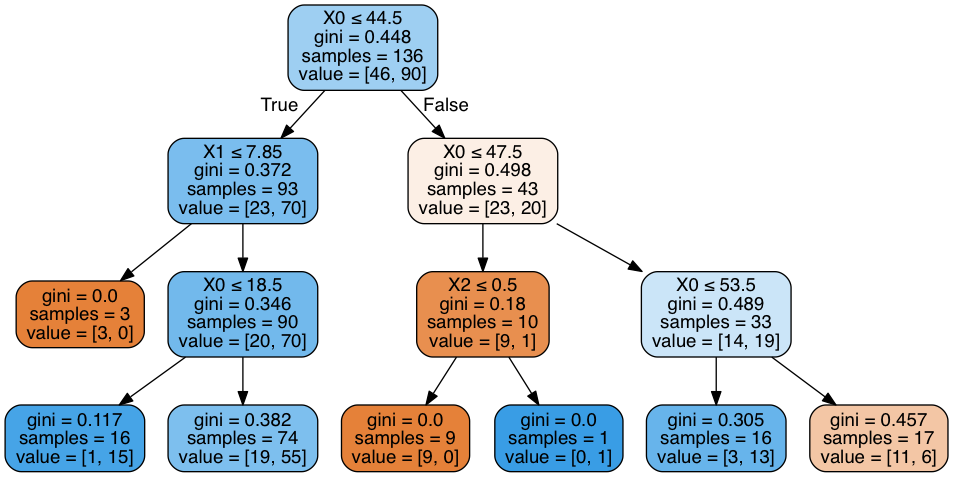

In [25]:
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [26]:
from sklearn.model_selection import GridSearchCV

In [56]:
params = { 
    'max_depth': [2, 3, 4, 5, 6],
    'min_samples_split' : [2, 5, 10, 15, 20],
    'criterion' : ['gini', 'entropy']}

In [57]:
grid = GridSearchCV(tree, param_grid=params)

In [58]:
grid.fit(X, y)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 3, 4, 5, 6], 'min_samples_split': [2, 5, 10, 15, 20], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [51]:
grid.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [52]:
bestest = grid.best_estimator_
bestest.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [53]:
grid.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

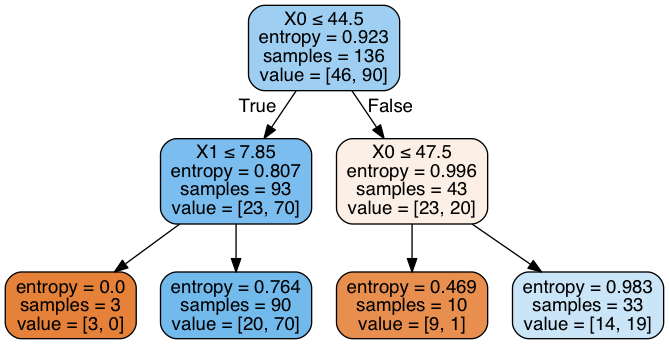

In [54]:
dot_data = StringIO()
export_graphviz(bestest, out_file=dot_data,  filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [55]:
bestest.score(X_test, y_test)

0.782608695652174

In [68]:
bestest.predict_proba([[49, 1, 1]])

array([[0.42424242, 0.57575758]])

### Feature Importance

In [69]:
clf.feature_importances_

array([0.03848331, 0.        , 0.57716082, 0.38435587])

In [70]:
def plot_importances(model):
    n_features = iris.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align = 'center')
    plt.yticks(np.arange(n_features), iris.feature_names)

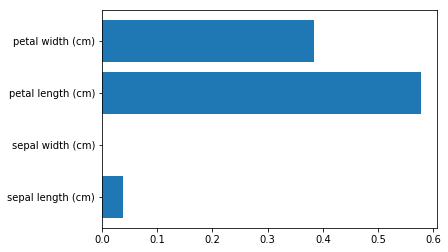

In [71]:
import numpy as np
plot_importances(clf)

### How important are different features?

In [76]:
#list of feature importance
clf.feature_importances_

array([0.60973164, 0.25346921, 0.13679915])

In [73]:
imp = clf.feature_importances_

<Container object of 4 artists>

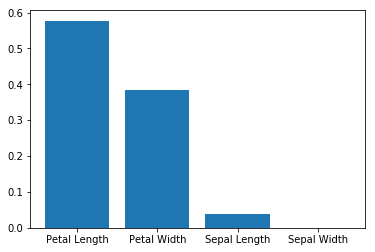

In [74]:
plt.bar(['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'], imp)

### Confusion Matrix

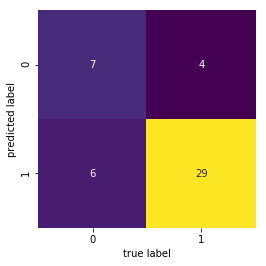

In [75]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

classifier=clf.fit(X_train,y_train)

predictions=clf.predict(X_test)

mat = confusion_matrix(y_test, predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cmap = 'viridis', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

### Cancer Example

- Train `LogisticRegression`, `KNearestNeighbors`, `GaussianNB`, and `DecisionTreeClassifier` models on the cancer data.  Compare their performance in terms of **accuracy**, **precision**, and **f1** score.

- Train a `DecisionTreeClassifier` searching for different values of hyperparameters including the `max_depth`

- Compare your unpruned decision tree to the result of your grid search

- Did these determine different features of import?

In [18]:
from sklearn.datasets import load_breast_cancer

In [19]:
cancer = load_breast_cancer()

In [20]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [21]:
import pandas as pd
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

In [22]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [24]:
cancer.target[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [25]:
X = cancer.data
y = cancer.target

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [27]:
lgr_clf = LogisticRegression()
dtree = DecisionTreeClassifier()
knn = KNeighborsClassifier()
nbclf = GaussianNB()

In [28]:
lgr_clf.fit(X_train, y_train)
dtree.fit(X_train, y_train)
knn.fit(X_train, y_train)
nbclf.fit(X_train, y_train)

GaussianNB(priors=None)

In [29]:
lgr_pred = lgr_clf.predict(X_test)
dtree_pred = dtree.predict(X_test)
knn_pred = knn.predict(X_test)
nbclf_pred = nbclf.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
lr_score = accuracy_score(y_test, lgr_pred)
lr_score

0.965034965034965

In [32]:
dtree_score = accuracy_score(y_test, dtree_pred)

In [33]:
knn_score = accuracy_score(y_test, knn_pred)
nb_score = accuracy_score(y_test, nbclf_pred)

In [34]:
dtree_score


0.9090909090909091

In [35]:
knn_score

0.9440559440559441

In [36]:
nb_score

0.9300699300699301

In [37]:
dtree.feature_importances_

array([0.        , 0.03129477, 0.        , 0.        , 0.        ,
       0.00824335, 0.        , 0.        , 0.        , 0.        ,
       0.00659468, 0.        , 0.        , 0.05898562, 0.        ,
       0.        , 0.00981982, 0.00741902, 0.01701128, 0.00234903,
       0.        , 0.00984975, 0.        , 0.12008677, 0.        ,
       0.        , 0.01335423, 0.70163744, 0.01335423, 0.        ])

In [38]:
cancer.data.shape

(569, 30)

### Example with Adolescent Health Data

![](images/addhealthherb.png)

In [39]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

from sklearn.metrics import classification_report
import sklearn.metrics

In [41]:
AH_data = pd.read_csv("data/tree_addhealth.csv")
data_clean = AH_data.dropna()
data_clean.dtypes

BIO_SEX      float64
HISPANIC     float64
WHITE        float64
BLACK        float64
NAMERICAN    float64
ASIAN        float64
age          float64
TREG1        float64
ALCEVR1      float64
ALCPROBS1      int64
marever1       int64
cocever1       int64
inhever1       int64
cigavail     float64
DEP1         float64
ESTEEM1      float64
VIOL1        float64
PASSIST        int64
DEVIANT1     float64
SCHCONN1     float64
GPA1         float64
EXPEL1       float64
FAMCONCT     float64
PARACTV      float64
PARPRES      float64
dtype: object

In [42]:
data_clean.marever1.value_counts()

0    3468
1    1107
Name: marever1, dtype: int64

In [43]:
predictors = data_clean[['BIO_SEX','HISPANIC','WHITE','BLACK','NAMERICAN','ASIAN',
'age','ALCEVR1','ALCPROBS1','cocever1','inhever1','cigavail','DEP1',
'ESTEEM1','VIOL1','PASSIST','DEVIANT1','SCHCONN1','GPA1','EXPEL1','FAMCONCT','PARACTV',
'PARPRES']]

targets = data_clean.marever1

pred_train, pred_test, tar_train, tar_test  =   train_test_split(predictors, targets, test_size=.4)

print(pred_train.shape, pred_test.shape, tar_train.shape, tar_test.shape)

(2745, 23) (1830, 23) (2745,) (1830,)


In [44]:
#Build model on training data
classifier=DecisionTreeClassifier(max_depth = 2)
classifier=classifier.fit(pred_train,tar_train)
predictions=classifier.predict(pred_test)

sklearn.metrics.confusion_matrix(tar_test,predictions)

array([[1267,   99],
       [ 255,  209]], dtype=int64)

In [45]:
sklearn.metrics.accuracy_score(tar_test, predictions)

0.8065573770491803

In [46]:
classifier.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.11260597, 0.23617609, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.65121794, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

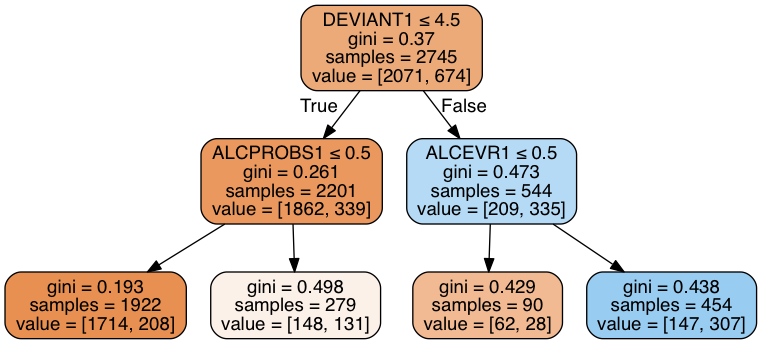

In [95]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus


dot_data2 = StringIO()
export_graphviz(classifier, out_file=dot_data2,  
                filled=True, rounded=True,
                special_characters=True, feature_names = list(predictors))
graph2 = pydotplus.graph_from_dot_data(dot_data2.getvalue())  
Image(graph2.create_png())

In [96]:
sklearn.metrics.accuracy_score(tar_test, predictions)

0.8131147540983606

In [97]:
clf.feature_importances_

array([0.60973164, 0.25346921, 0.13679915])

### Deeper Dive

Let's explore the data around substance abuse more.  For example, let's examine the relationships between other substances and the input predictors.  Do they identify the same primary feature importance? Make sure you limit your tree depth, as it will grow quite deep if you let it.

In [85]:
classifier=DecisionTreeClassifier(max_depth = 5)
classifier=classifier.fit(pred_train,tar_train)
predictions=classifier.predict(pred_test)

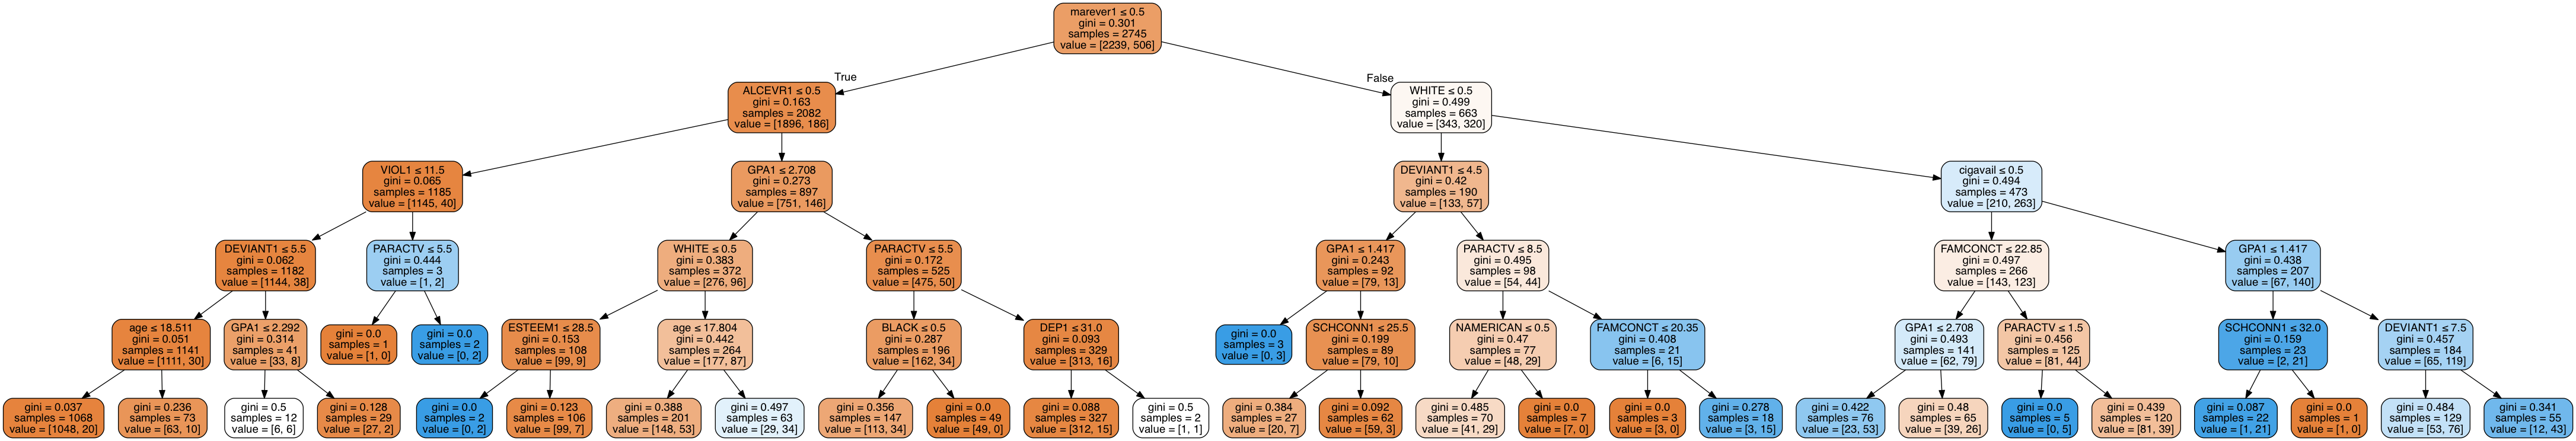

In [86]:
dot_data2 = StringIO()
export_graphviz(classifier, out_file=dot_data2,  
                filled=True, rounded=True,
                special_characters=True, feature_names=predictors.columns)
graph2 = pydotplus.graph_from_dot_data(dot_data2.getvalue())  
Image(graph2.create_png())

In [58]:
predictors = data_clean[['BIO_SEX','HISPANIC','WHITE','BLACK','NAMERICAN','ASIAN',
'age','ALCEVR1','ALCPROBS1', 'TREG1','cocever1','inhever1','cigavail','DEP1',
'ESTEEM1','VIOL1','PASSIST','DEVIANT1','SCHCONN1','GPA1','EXPEL1','FAMCONCT','PARACTV',
'PARPRES']]

targets = data_clean.marever1

pred_train, pred_test, tar_train, tar_test  =   train_test_split(predictors, targets, test_size=.4)

print(pred_train.shape, pred_test.shape, tar_train.shape, tar_test.shape)

(2745, 24) (1830, 24) (2745,) (1830,)


In [59]:
classifier=DecisionTreeClassifier(max_depth = 5)
classifier=classifier.fit(pred_train,tar_train)
predictions=classifier.predict(pred_test)

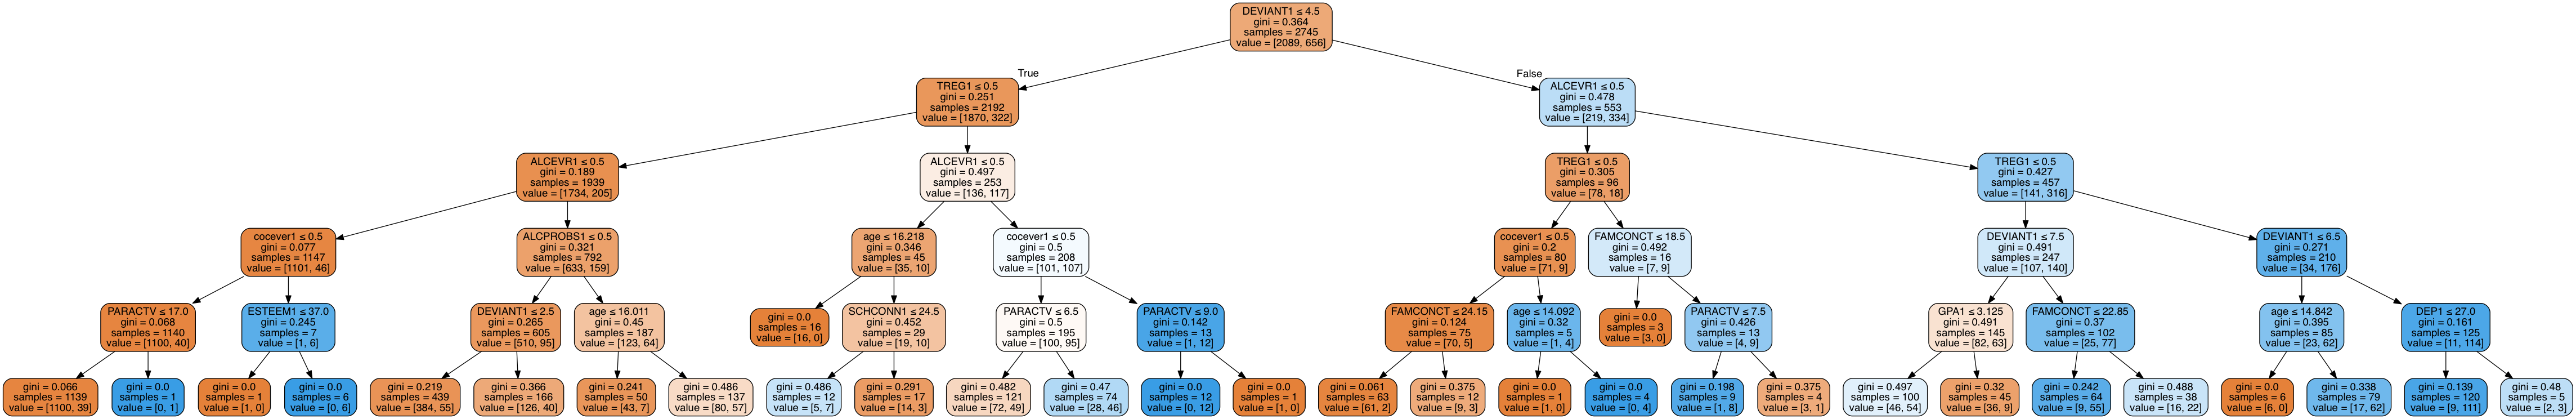

In [60]:
dot_data2 = StringIO()
export_graphviz(classifier, out_file=dot_data2,  
                filled=True, rounded=True,
                special_characters=True, feature_names=predictors.columns)
graph2 = pydotplus.graph_from_dot_data(dot_data2.getvalue())  
Image(graph2.create_png())

In [100]:
classifier=DecisionTreeClassifier()
classifier=classifier.fit(pred_train,tar_train)
predictions=classifier.predict(pred_test)

sklearn.metrics.confusion_matrix(tar_test,predictions)

array([[1148,  249],
       [ 238,  195]])

In [101]:
classifier.feature_importances_

array([0.00811569, 0.00364632, 0.00811679, 0.00550739, 0.00451307,
       0.00507494, 0.07974794, 0.04362028, 0.089254  , 0.03319033,
       0.01031975, 0.01828155, 0.08584778, 0.06078707, 0.03516432,
       0.020343  , 0.21363242, 0.04996701, 0.05823181, 0.00345549,
       0.05843292, 0.06010321, 0.04464693])